In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

if(len(os.sys.argv) > 1):
    if os.sys.argv[1] == 'gpu':
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
        config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
    elif os.sys.argv[1] == 'cpu':
        os.environ['CUDA_VISIBLE_DEVICES']="" 
else:
    os.environ['CUDA_VISIBLE_DEVICES']=""

In [2]:
os.listdir('.')

['project3_COSC525.zip',
 '.ipynb_checkpoints',
 'project3.pdf',
 'training.ipynb',
 'task1.py',
 '__pycache__',
 'read_data.py',
 'task2.py',
 'reading.ipynb',
 'project3_COSC525']

In [4]:
def read_imgs(path):
    files = os.listdir(path)
    files.sort(key=natural_keys)

    images = []
    for file in files:
        pix = np.array(Image.open(path + file))
        images.append(pix)

    return np.asarray(images)


train = read_imgs('./project3_COSC525/train/')
val = read_imgs('./project3_COSC525/val/')


train = np.asarray(train)
val = np.asarray(val)

print(len(train))
print(len(val))

86744
10954


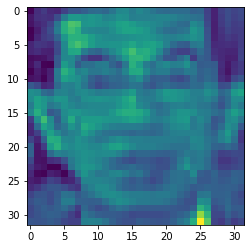

In [5]:
plt.imshow(train[0])

In [6]:
print(train.shape)
train_max = np.amax(train, axis=0)
train_min = np.amin(train, axis=0)

(86744, 32, 32)


In [7]:
#normalize
train_norm = (train - train_min) / (train_max - train_min)
train_norm.shape
val_norm = (val - train_min) / (train_max - train_min)

train_norm = train_norm.reshape(-1,32,32,1)



In [8]:
print(train_norm.shape)

(86744, 32, 32, 1)


In [9]:
train_labels = pd.read_csv('project3_COSC525/fairface_label_train.csv')
val_labels = pd.read_csv('project3_COSC525/fairface_label_val.csv')

In [10]:
age_classes = train_labels.age.unique()
gender_classes = train_labels.gender.unique()
race_classes = train_labels.race.unique()

In [11]:
race_classes.shape

(7,)

In [12]:
codes,_ = train_labels.race.factorize()


In [13]:
codes
labels = np.zeros((len(codes), race_classes.size))
for i, c in enumerate(codes):
    labels[i,c] = 1
# print(labels.tolist())

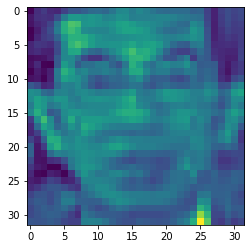

50-59
Male
East Asian


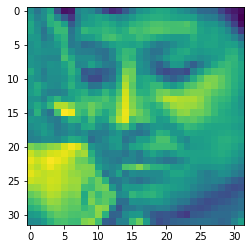

30-39
Female
Indian


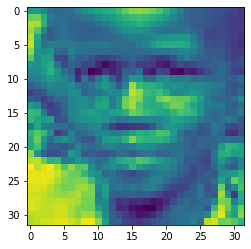

3-9
Female
Black


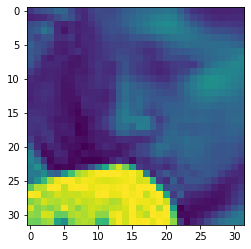

20-29
Female
Indian


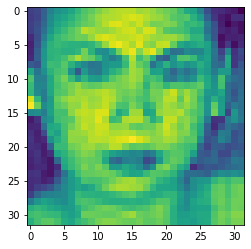

20-29
Female
Indian


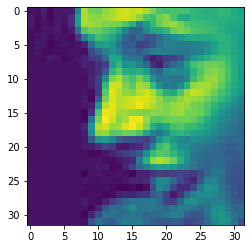

20-29
Male
White


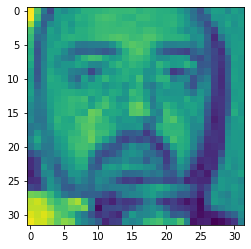

40-49
Male
Middle Eastern


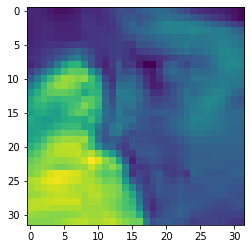

30-39
Female
Indian


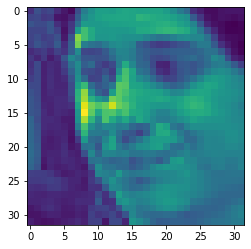

10-19
Male
White


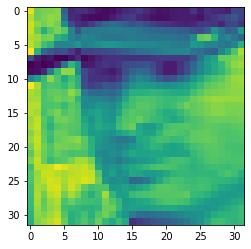

30-39
Male
Middle Eastern


In [14]:
for n in range(10):
    plt.imshow(train_norm[n])
    plt.show()
    print(train_labels.age[n])
    print(train_labels.gender[n])
    print(train_labels.race[n])